In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.grid'] = False
plt.style.context('Solarize_Light2')

roots = [0.3018336135076354, 0.7883671029813581, 0.9723445185469877, 1.2390777517571931, 1.6410179299284857, 1.9728374883141215, 2.2691853142129728]
ms = [0.0004, 0.0625, 0.125, 0.25, 0.5, 0.75, 1.0]
get_crit_T = dict(zip(ms, roots))
num_temps = 100
num_epochs = 3

In [2]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [5]:
M = 1.0
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
#epochs = opt_epochs[Jd]

#epochs = [5] * 4

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

52 49 56
2.2927857023101783 0.5012718757764014 0.0013
51 48 55
2.273644916368144 0.49965082561671426 0.0003
50 47 54
2.272725862540939 0.5027090851971353 0.0027
51 48 55
2.277244414075938 0.5005237280919483 0.0005
50 47 54
2.2731342153896246 0.49940977980859275 0.0006


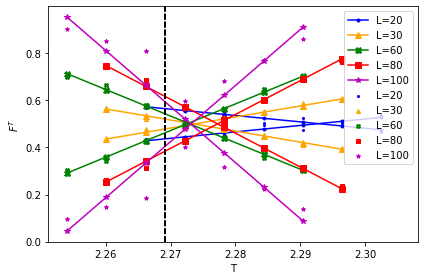

In [6]:
from scipy.optimize import curve_fit


markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

amin = np.argmin(diff)

def line(x, a, b):
    return a*x + b 

def line_fit(y, x):
    popt, pcov = curve_fit(line, xdata=x, ydata=y, absolute_sigma=False, maxfev=100000)
    return popt, pcov


for i, L in enumerate(Ls):
    
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    amin = np.argmin(diff)
    
    print(amin, amin-3, amin+4)
    
    data_0 = errs(outs_[i][:, 0])[amin-3:amin+4]
    data_1 = errs(outs_[i][:, 1])[amin-3:amin+4]
    
    T_fit = T[amin-3:amin+4]
    
    pl_0, pcov_0 = line_fit(y=data_0, x=T_fit)
    pl_1, pcov_1 = line_fit(y=data_1, x=T_fit)
    
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    plt.scatter(T_fit, data_0, marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    plt.scatter(T_fit, data_1, marker=markers[i], s=16, c=colors[i])
    
    plt.plot(T_fit, line(T_fit, pl_0[0], pl_0[1]), marker=markers[i], label=f'L={L}', c=colors[i])
    plt.plot(T_fit, line(T_fit, pl_1[0], pl_1[1]), marker=markers[i], c=colors[i])
    
    a1, b1, a2, b2 = pl_0[0], pl_0[1], pl_1[0], pl_1[1]
    print((b2 - b1)/(a1-a2), (a1*b2-a2*b1)/(a1-a2), np.round(np.abs((a1*b2-a2*b1)/(a1-a2) - 0.5), 4))
    # plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i])


    plt.axvline(x=T_c, color='black', linestyle='--')
    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$F^T$')

#plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/m-{M}-f.png')

In [44]:
def line(x, a, b):
    return a*x + b 

def line_fit(y, x):
    popt, pcov = curve_fit(line, xdata=x, ydata=y, absolute_sigma=False, maxfev=100000)
    return popt, pcov


pl_, pcov_ = line_fit(y=np.log(np.abs(cs_)), x=np.log(ls))
pl_r, pcov_r = line_fit(y=np.log(np.abs(cs_r)), x=np.log(ls))
pl_l, pcov_l = line_fit(y=np.log(np.abs(cs_l)), x=np.log(ls))
#pl_00 = np.polyfit(np.log(ls), np.log(cs), 1)

perr_line = np.sqrt(np.diag(pcov_))
perr_r_line = np.sqrt(np.diag(pcov_r))
perr_l_line = np.sqrt(np.diag(pcov_l))

#plt.scatter(ls, cs, color='red')
plt.errorbar(ls, cs_, yerr=perr_[:, 2], fmt="o", color='black', label='$\sigma_f\sim$1\L^{0:.4f}({1:.4f})'.format(round(pl_[0], 4), round(perr_line[0], 4)))
plt.errorbar(ls, cs_r, yerr=perr_r[:, 2], fmt="o", color='red', label='$\sigma_r\sim$1\L^{0:.4f}({1:.4f})'.format(round(pl_r[0], 4), round(perr_r_line[0], 4)))
plt.errorbar(ls, cs_l, yerr=perr_l[:, 2], fmt="o", color='green', label='$\sigma_l\sim$1\L^{0:.4f}({1:.4f})'.format(round(pl_l[0], 4), round(perr_l_line[0], 4)))
#plt.plot(ls, np.exp(np.poly1d(pl_00)(np.log(ls))))

plt.plot(ls, np.exp(line(np.log(ls), pl_[0], pl_[1])), color='black')
plt.plot(ls, np.exp(line(np.log(ls), pl_r[0], pl_r[1])), color='red')
plt.plot(ls, np.exp(line(np.log(ls), pl_l[0], pl_l[1])), color='green')

#plt.title(f'M = {M}')
plt.xlabel('1/L')
plt.ylabel('$\sigma$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(f'images/{M}-sigmas.png')

NameError: name 'cs_' is not defined